In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper() 
dls = ImageDataLoaders.from_name_func(
path, get_image_files(path), valid_pct=0.2, seed=42,
label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/opt/anaconda3/lib/python3.9/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/chreachanchhunneng/.cache/torch/hub/

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,0.171239,0.022753,0.008119,12:14


epoch,train_loss,valid_loss,error_rate,time
0,0.054342,0.022192,0.008119,18:58


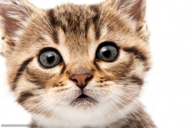

In [5]:
img = PILImage.create('bird_or_not/Cat/0bfd09af-dee1-41e1-a357-e9c35df76e34.jpg')
img.to_thumb(192)

In [12]:
!pip install -Uqq fastbook

In [16]:
from fastbook import *
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: True.
Probability it's a cat: 1.000000


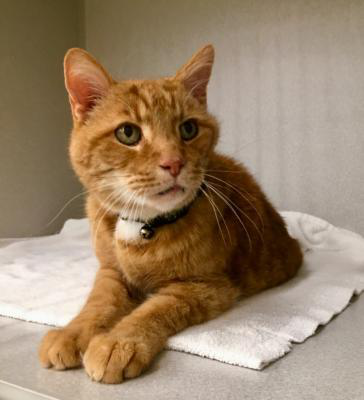

In [19]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img